In [61]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [62]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
replicate='ns_8_3_15-24-51-1895/'
filename='tests.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)

Filepath: /home/ebb505/ARE_Project/are-logs/morphology5_3_12-17-32-2905/tests.csv


In [63]:
# Import data from csv
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[:-1]) # Last character is empty for some reason

In [64]:
# Estimate average for each generation
population = 40
evaluations = len(my_list)
featureSize = len(my_list[0])
print("Number of evaluations: ", evaluations, "Features size: ", featureSize)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array


Number of evaluations:  30000 Features size:  6


In [65]:
# Analyse data
sumSkeleton = []
sumHeadConneted = []
sumNoCollisions = []
sumNoBadOrientations = []
sumGripperAccess = []
for i in range(population,evaluations,population):
    sumSkeleton.append(sum(dat[:i,1] > 0)/i)
    sumNoCollisions.append(sum(dat[:i,2] > 0)/i)
    sumNoBadOrientations.append(sum(dat[:i,3] > 0)/i)
    sumHeadConneted.append(sum(dat[:i,4] > 0)/i)
    sumGripperAccess.append(sum(dat[:i,5] > 0)/i)

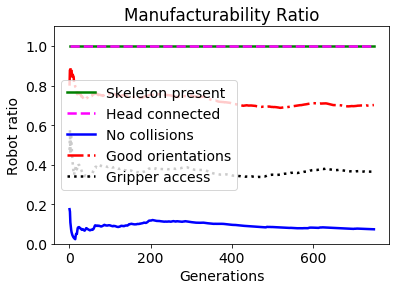

In [66]:
# Plot stuff
xValues = list(range(population, evaluations, population))
xValues = [x/population for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot(xValues, sumSkeleton, '-', color='green', linewidth=2.5)
plt.plot(xValues, sumHeadConneted, '--', color='magenta', linewidth=2.5)
plt.plot(xValues, sumNoCollisions, '-', color='blue',  linewidth=2.5)
plt.plot(xValues, sumNoBadOrientations, '-.', color='red',  linewidth=2.5)
plt.plot(xValues, sumGripperAccess, ':', color='black',  linewidth=2.5)
plt.xlabel('Generations')
plt.ylabel('Robot ratio')
axes = plt.gca()
axes.set_ylim([0,1.1])
plt.legend(['Skeleton present', 'Head connected', 'No collisions','Good orientations','Gripper access' ])
plt.title("Manufacturability Ratio")
plt.savefig(repository+replicate+'manRatio.png',dpi=200)